In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Plot vs Seaborn

In [2]:
df_IN = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()
df_IN = df_IN.dropna(subset='salary_year_avg')

#### Using Plot in horizontal bar

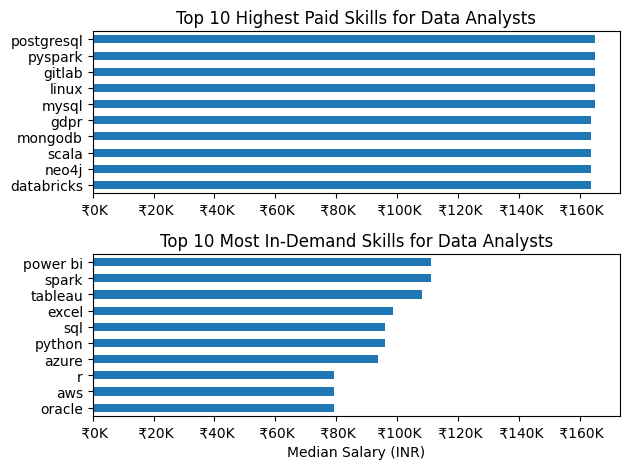

In [3]:
df_IN=df_IN.explode('job_skills')
df_DA_IN_group = df_IN.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_IN_top_pay= df_DA_IN_group.sort_values(by='median',ascending=False).head(10)
df_DA_skills = df_DA_IN_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

fig ,ax = plt.subplots(2,1)

df_DA_IN_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f' ₹{int(x/1000)}K'))


df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (INR)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f' ₹{int(x/1000)}K'))

plt.tight_layout()
plt.show()

#### Using Seaborn  horizontal bar

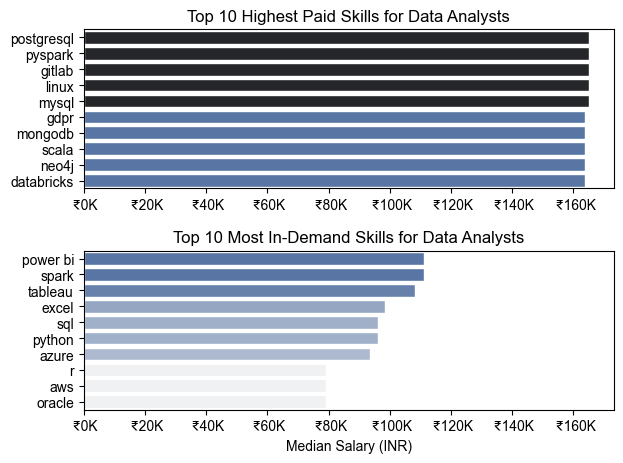

In [9]:
fig ,ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_IN_top_pay, x='median', y=df_DA_IN_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r',legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f' ₹{int(x/1000)}K'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b',legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (INR)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f' ₹{int(x/1000)}K'))

plt.tight_layout()
plt.show()

#### Use plot in Histogram

In [11]:
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])

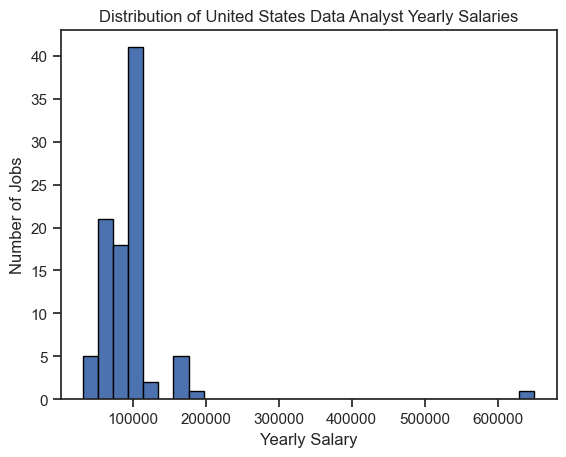

In [12]:
df_DA_IN['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

#### Use seaborn in Histogram

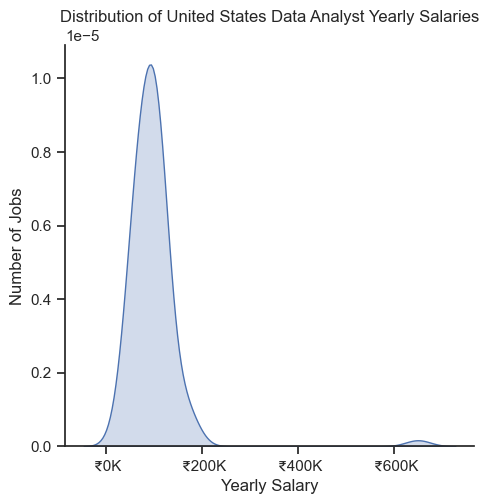

In [15]:
sns.displot(df_DA_IN['salary_year_avg'], kind='kde', fill=True, common_norm=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f' ₹{int(y/1000)}K'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()